In [1]:
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline


In [ ]:
df = pd.read_csv('../zippedData/imdb.title.akas.csv.gz')

This data set seems like it describes what the name of the movie was in a particular country

In [3]:
df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
title_id             331703 non-null object
ordering             331703 non-null int64
title                331703 non-null object
region               278410 non-null object
language             41715 non-null object
types                168447 non-null object
attributes           14925 non-null object
is_original_title    331678 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [50]:
df.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


So this data set can answer the question of How WIDELY the movie was released internationally. We have the region and we have te title_id!! So let's strip this down. We should drop ALL rows where region is NaN. And where title is also NaN. We just want two columns, the title_id and the region that it wa released in.

In [15]:
grouped_by_region = df[df.title_id.notnull() & df.region.notnull()].groupby(['region']).region.count()

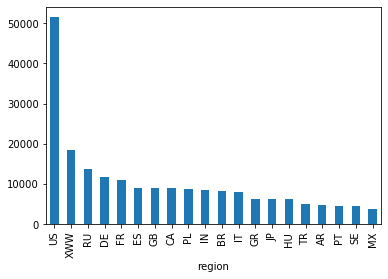

In [27]:
grouped_by_region.sort_values(ascending = False)[:20].plot(kind='bar');b

In [31]:
grouped_by_region = grouped_by_region.sort_values(ascending = False)[:20]

I suspect that the us releases more movies than the other top 5 combined! To test this i will create a little for loop that sums the movies released by country and returns the index where the sum is greater than the us number of total releases. 

Something to keep in mind is that the us was producing movies en mass long befroe other countries started so they had a head start. We shoul filter our analyis by year. 

Also 

In [47]:
def find_cumulative_production(series):
    run_sum = 0
    for country in enumerate(grouped_by_region):
        if country[0] == 0:
            continue
        else:
            run_sum += country[1]
        if run_sum > grouped_by_region[0]:
            return (list(grouped_by_region.index[1:country[0]]))

    
    

In [49]:
find_cumulative_production(grouped_by_region)

['XWW', 'RU', 'DE']

Without normalization for population, the us produces more than the other top 3 combined! We should expect the us to gross a 3 times as much, right? Or is there an effect of population density and or culture? 